# General Information
Created by :
- Marsoni David
- Zanya Fernandez Rodriguez

Group : DM_ZF

In [2]:
# install required packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install prettytable
%pip install colorama
%pip install scikit-learn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from colorama import Fore, Style
from scipy.stats import norm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Scikit-learn libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
    classification_report, confusion_matrix, silhouette_score, 
    precision_score, recall_score, f1_score
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Constants for the notebook
RANDOM_STATE = 42
TEST_SIZE = 0.3


# **Graded Notebook**

#### **Dataset Information**

We will use the **Advertising dataset**. This dataset contains information on advertising budgets for TV, radio, and newspapers, and their relationship with product sales.

You can download the dataset using the following steps:

1. Open your web browser and navigate to this link: [Advertising.csv](https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv)
2. Right-click on the page and select **Save As** (or the equivalent option in your browser).
3. Save the file as `Advertising.csv` in the same directory as this notebook.

## **Task 1: Predicting Sales from Advertising Data**

### **1. Data Exploration and Preparation (10 points)**

#### **1.1: Load, inspect and display the dataset (10 points)**
- Load the provided dataset (`Advertising.csv`).
- Display, print or plot any relevant information.
- What can you say about the data?


In [5]:
# load data from csv file
file_name = 'Advertising.csv'
df = pd.read_csv(file_name)

In [6]:
# Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Data verifications

In [7]:
# check for missing values
null_counts = df.isnull().sum()
print("\nNull values in each column:")
for column, count in null_counts.items():
    print(f"{column}: {count}")

# check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Null values in each column:
Unnamed: 0: 0
TV: 0
Radio: 0
Newspaper: 0
Sales: 0

Number of duplicate rows: 0


### Observations:
- The dataset is composed of 200 rows and 4 columns.
- The features are TV, Radio, and Newspaper and the target is Sales.
- All the values are numerical and there are no missing values or duplicates.

This dataset seems to have information about the advertising budgets for TV, radio, and newspapers, and their relationship with product sales. <br>
The unit of the budget is not mentioned in the dataset, but it is assumed to be in thousands of dollars <br>
The unit of the sales is not mentioned in the dataset, but it is assumed to be in millions of dollars <br>



### Preprocessing of the data

In [8]:
# prepare data for plotting
features = df[['TV', 'Radio', 'Newspaper']].values
target = df['Sales'].values

feature_names = df.columns[1:-1]
target_name = df.columns[-1]

### Visualitation of the data

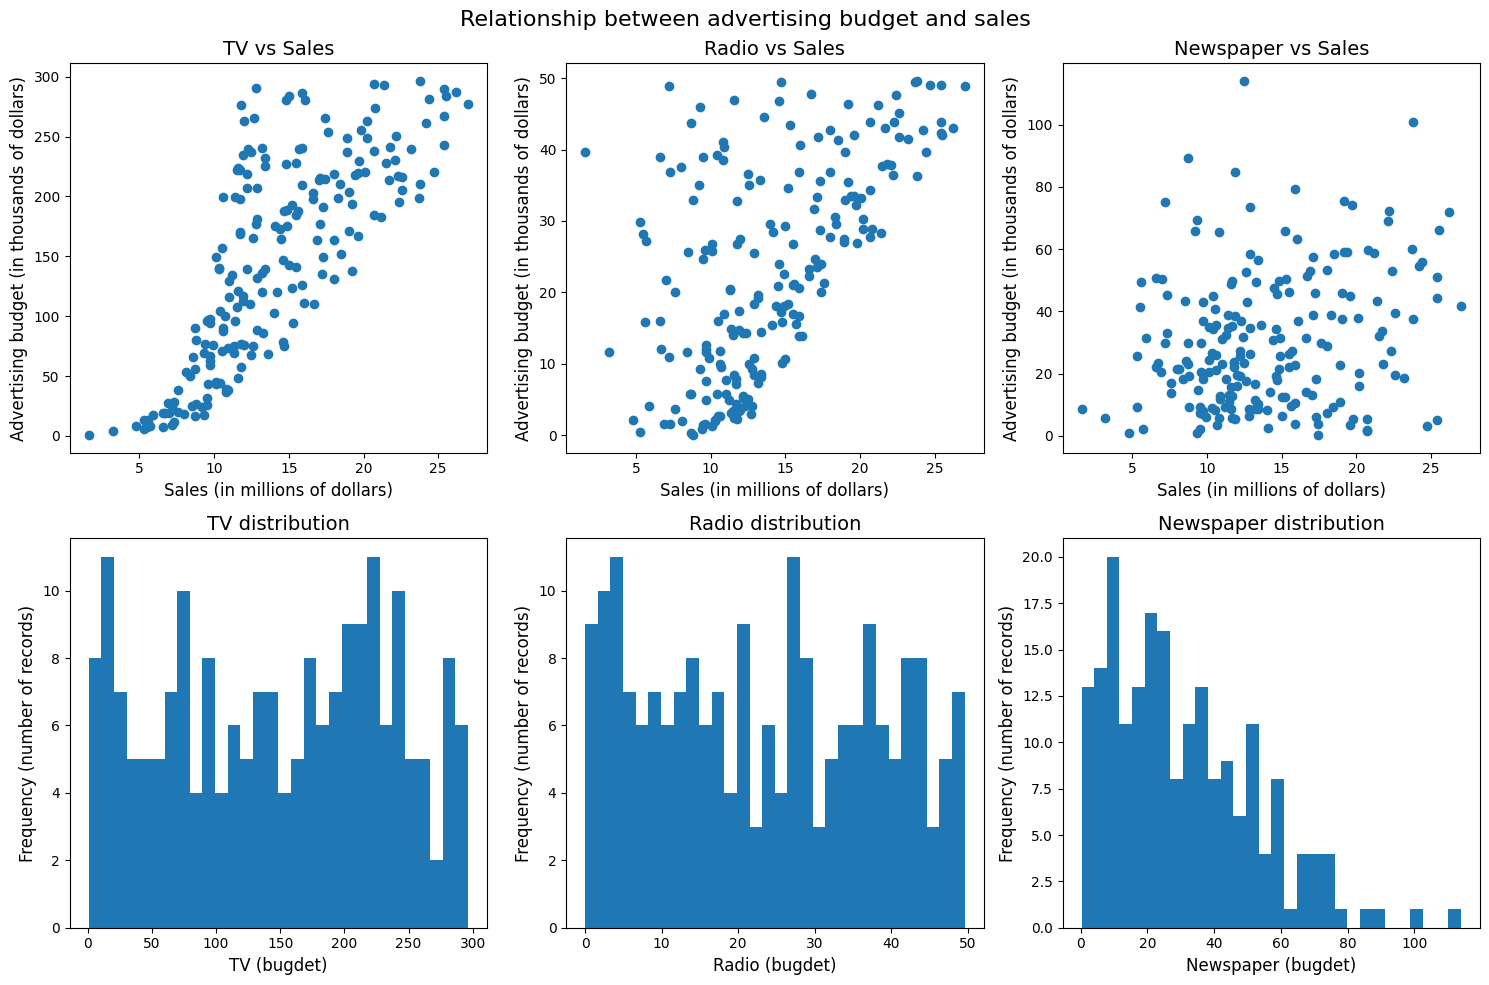

In [9]:
# Update the plotting code with inverted axes for scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(len(feature_names)):
    
    # scatter plot to show the relationship between the feature and target
    axs[0,i].scatter(target, features[:, i])  
    axs[0,i].set_ylabel("Advertising budget (in thousands of dollars)", fontsize=12)
    axs[0,i].set_xlabel(target_name+ " (in millions of dollars)", fontsize=12)
    axs[0,i].set_title(f'{feature_names[i]} vs {target_name}', fontsize=14)
    axs[0,i].tick_params(axis='both', which='major', labelsize=10)
    
    # Histogram to show the distribution of the feature
    axs[1,i].hist(features[:, i], bins=30)
    axs[1,i].set_xlabel(feature_names[i] + " (bugdet)", fontsize=12)
    axs[1,i].set_ylabel('Frequency (number of records)', fontsize=12)
    axs[1,i].set_title(f'{feature_names[i]} distribution', fontsize=14)
    axs[1,i].tick_params(axis='both', which='major', labelsize=10)


# Add the main title to the plot
plt.suptitle("Relationship between advertising budget and sales", fontsize=16)


plt.tight_layout()
plt.show()

### More Observations:
Feature TV 
- Seems to have a linear relationship with the target Sales. <br>
- The distribution of the data is uniform. <br>

Feature Radio 
- Seems to have a linear relationship with the target Sales but with more noise than TV. <br>
- The distribution of the data is uniform. <br>

Feature Newspaper
- seems to not really have a any relationship with the target Sales. <br>
- The distribution of the data is not uniform there are more smaller budgets than bigger budgets. <br>

All theses features are more switable for linear regression models because they seem to have a relationship with the target Sales witch is a continuous value. <br>

---

### **2. Regression Analysis (40 points)**

#### **2.1: Train a Linear Regression Model (15 points)**
- Train a linear regression model for each feature and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


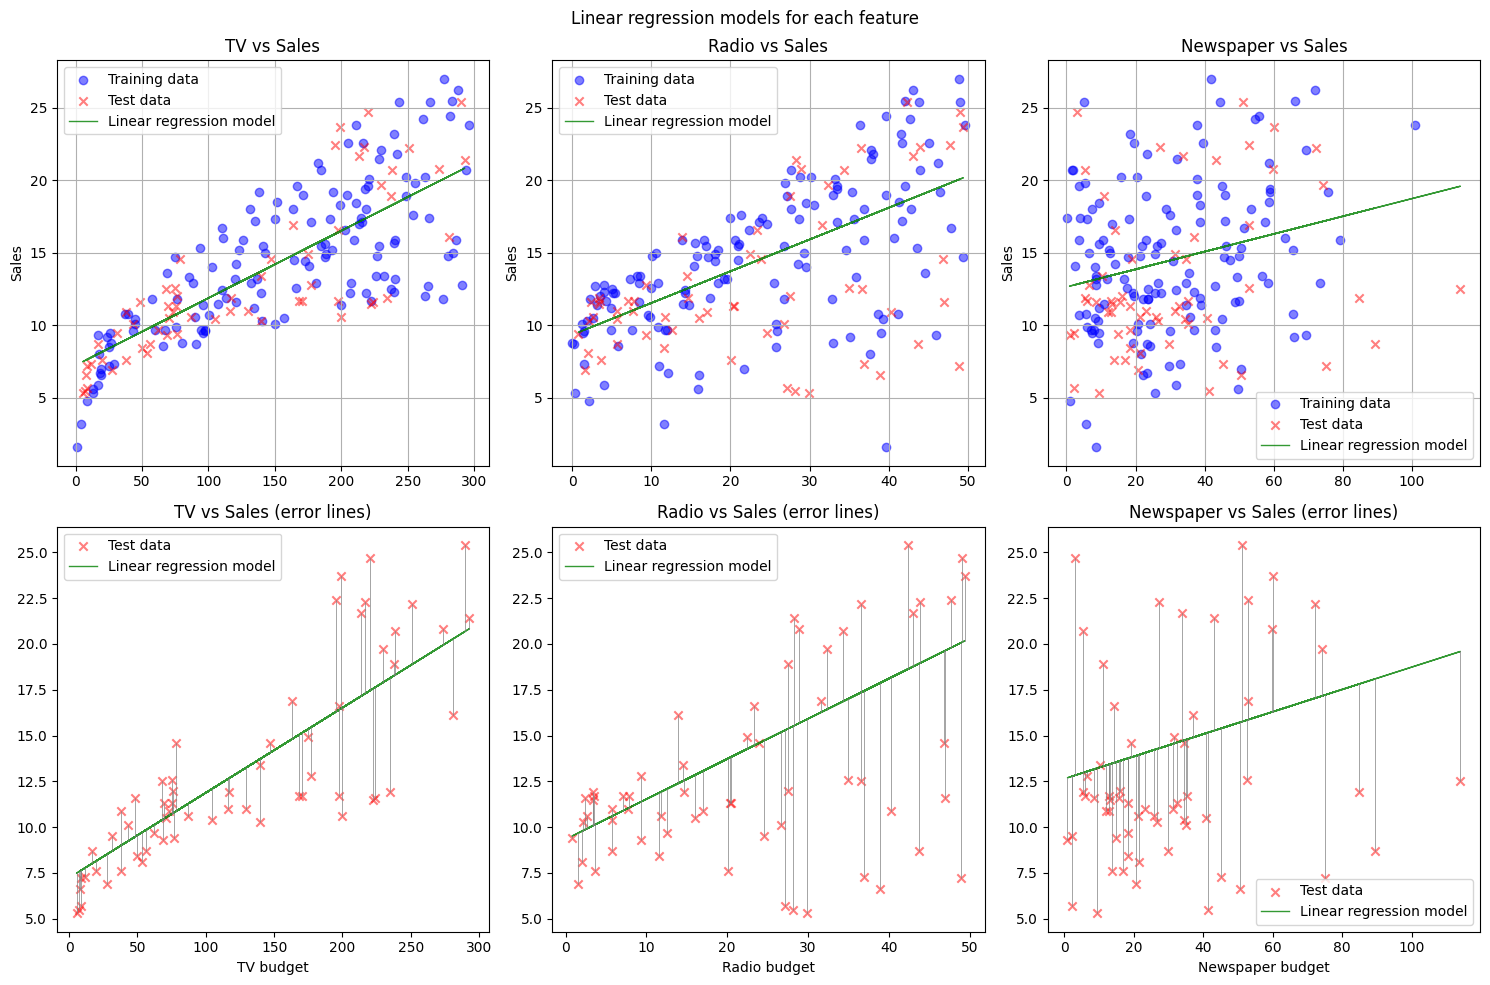

+-----------+--------------------+---------------------+-----------+
|  Feature  | Mean Squared Error | Mean Absolute Error | R^2 Score |
+-----------+--------------------+---------------------+-----------+
|     TV    |       8.971        |        2.276        |   0.671   |
|   Radio   |       23.723       |        3.703        |   0.131   |
| Newspaper |       28.869       |         4.56        |   -0.057  |
+-----------+--------------------+---------------------+-----------+
MSE lower is better, MAE lower is better, R^2 Score higher is better


In [10]:
# subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# create a table to store the model performance
table = PrettyTable() 
table.field_names = ["Feature", "Mean Squared Error", "Mean Absolute Error", "R^2 Score"]

# Iterate over each feature
for i in range(len(feature_names)):
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features[:, i], target, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    # Reshape the data to a 2D array for the model fit
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    Y_train = y_train.reshape(-1, 1)
    Y_test = y_test.reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate residuals
    residuals = Y_test - y_pred
    
    # Plot the model
    axs[0,i].scatter(X_train, Y_train, color='blue', alpha=0.5,label='Training data')
    axs[0,i].scatter(X_test, Y_test, color='red', marker='x', alpha=0.5,label='Test data')
    axs[1,i].scatter(X_test, Y_test, color='red', marker='x', alpha=0.5,label='Test data')
    axs[0,i].plot(X_test, y_pred, color='green', linewidth=1, alpha=0.8, label='Linear regression model')
    axs[1,i].plot(X_test, y_pred, color='green', linewidth=1, alpha=0.8, label='Linear regression model')
    # Plot the error lines
    for j in range(len(X_test)):
        axs[1,i].plot([X_test[j], X_test[j]], [Y_test[j], y_pred[j]], color='gray', linewidth=0.5)
    
    axs[0,i].set_title(f'{feature_names[i]} vs Sales')
    axs[1,i].set_xlabel(f'{feature_names[i]} budget')
    axs[0,i].set_ylabel('Sales')
    axs[0,i].grid(True)
    axs[0,i].legend()
    
    axs[1,i].set_title(f'{feature_names[i]} vs Sales (error lines)')
    axs[1,i].legend()
    
    # Calculate the model performance
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    # Add the results to the table
    table.add_row([feature_names[i], round(mse, 3), round(mae, 3), round(r2, 3)])
    
fig.suptitle('Linear regression models for each feature')
fig.tight_layout()

plt.show()

print(table)
print("MSE lower is better, MAE lower is better, R^2 Score higher is better")

### Interpretation of the results

Between the three features, TV seems to be the most suitable for a linear regression model because it has the highest R² score along with the lowest MSE and MAE. <br>

For the TV feature :
- The R² score has a value that show that the model is generally not too bad at predicting the target Sales. <br>
- The MSE has a low value, which means that the model is good at predicting the target Sales. <br>
But in general, the model is clearly not perfect because the R² score is not close enough to 1. <br>


For the Radio feature :
- The R² score has a value thas is really close to 0 which means that the model is not good at predicting the target Sales. <br>
- The MSE has a high value, which means that the model is also not good at predicting the target Sales. <br>

For the Newspaper feature :
- The R² score is negative, which means that the model is worse than a horizontal line. <br>
This is because the feature Newspaper does not have a relationship with the target Sales. The value of this feature does not affect the target Sales. <br>
- The MSE has a high value, which means that the model is also not good at predicting the target Sales. <br>

### Global Interpretation of the results

The regression line that represents the relationship between the TV feature and the target Sales have a slighly steeper slope than the other feature regression line. That means that the TV feature has a bigger impact on the target Sales than the other features. <br>


#### **2.2: Polynomial Features (25 points)**
- Extend the regression model by adding polynomial features.
- Evaluate the models performances.
- Display, print or plot any relevant information.
- Discuss which model fits the data best and why.

C:\Users\david\AppData\Local\Temp\ipykernel_13028\2031877573.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance = pd.concat([performance, pd.DataFrame([{


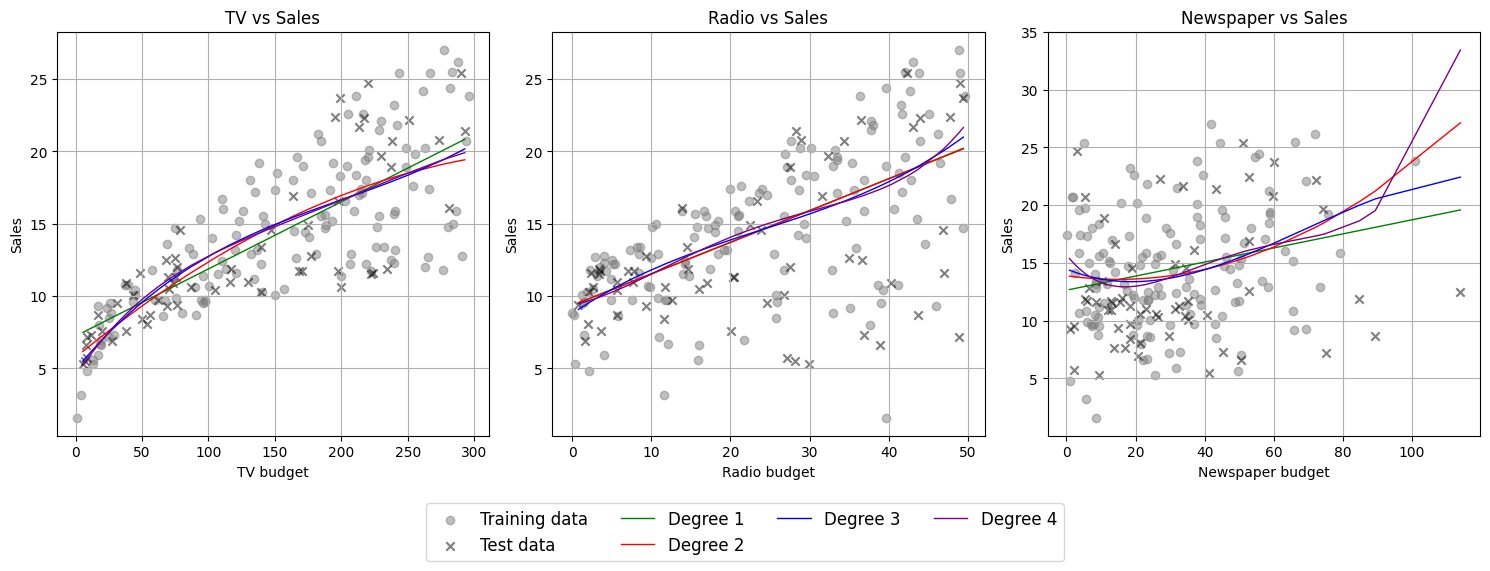

+----------------------------------------------+
|              Model Performance               |
+-----------+--------+--------+-------+--------+
|  Feature  | Degree |  MSE   |  MAE  |   R2   |
+-----------+--------+--------+-------+--------+
|     TV    |   1    | 8.971  | 2.276 | 0.671  |
|     TV    |   2    | 9.416  | 2.351 | 0.655  |
|     TV    |   3    | 9.422  | 2.368 | 0.655  |
|     TV    |   4    | 9.394  | 2.366 | 0.656  |
|   Radio   |   1    | 23.723 | 3.703 | 0.131  |
|   Radio   |   2    | 23.716 | 3.701 | 0.131  |
|   Radio   |   3    | 23.825 |  3.72 | 0.127  |
|   Radio   |   4    | 24.086 | 3.715 | 0.118  |
| Newspaper |   1    | 28.869 |  4.56 | -0.057 |
| Newspaper |   2    | 33.042 | 4.769 | -0.21  |
| Newspaper |   3    | 30.378 | 4.627 | -0.113 |
| Newspaper |   4    | 35.025 | 4.737 | -0.283 |
+-----------+--------+--------+-------+--------+
MSE lower is better, MAE lower is better, R2 higher is better and if negative, model is worse than a horizontal line


In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for different degrees
colors = ['green', 'red', 'blue', 'purple']

# Create array of degrees
degrees = np.arange(1, 5)

# To use the colors in sequence matching degrees length:
color_sequence = [colors[i % len(colors)] for i in range(20)]

# create table to store the model performance metrics for each feature and for each degree
performance = pd.DataFrame(columns=['Feature', 'Degree', 'MSE', 'MAE', 'R2'])

# Iterate over each feature
for i in range(len(feature_names)):
    # Split data once per feature
    X_train, X_test, y_train, y_test = train_test_split(features[:, i], target, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    # Plot data points
    axs[i].scatter(X_train, y_train, color='gray', alpha=0.5, label='Training data')
    axs[i].scatter(X_test, y_test, color='black', marker='x', alpha=0.5, label='Test data')
    
    # Reshape data
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Sort X_test for smooth line plotting only
    X_test_sorted = np.sort(X_test, axis=0)

    for deg, color in zip(degrees, color_sequence):
        # Create polynomial features
        poly = PolynomialFeatures(degree=deg)
        X_train_poly = poly.fit_transform(X_train)
        
        # Create two versions of test data - sorted (for plotting) and unsorted (for metrics)
        X_test_poly = poly.transform(X_test)  # unsorted - for metrics
        X_test_sorted_poly = poly.transform(X_test_sorted)  # sorted - for plotting
        
        # Fit model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # Plot using sorted data
        y_pred_plot = model.predict(X_test_sorted_poly)
        axs[i].plot(X_test_sorted, y_pred_plot, color=color, linewidth=1, label=f'Degree {deg}')
        
        # Calculate metrics using unsorted data
        y_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Append to the performance table
        performance = pd.concat([performance, pd.DataFrame([{
            'Feature': feature_names[i], 
            'Degree': deg, 
            'MSE': mse, 
            'MAE': mae, 
            'R2': r2
        }])], ignore_index=True)
    
    axs[i].set_title(f'{feature_names[i]} vs Sales')
    axs[i].set_xlabel(f'{feature_names[i]} budget')
    axs[i].set_ylabel('Sales')
    axs[i].grid(True)

# Add a single legend below all the subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize='12')

plt.tight_layout()
plt.show()

# Display the performance metrics for each feature and degree

# Round numeric columns to 3 decimal places
performance = performance.round(3)

table = PrettyTable()
table.title = 'Model Performance'
table.field_names = performance.columns

for row in performance.itertuples(index=False):
    table.add_row(row)

print(table)
print("MSE lower is better, MAE lower is better, R2 higher is better and if negative, model is worse than a horizontal line")

### Observations:
For all the features. the polynomial regression models don't have better performances than the linear regression models. <br> 
We think that is because the relationship between the features and the target Sales is nither linear nor polynomial. <br>

For the 2 first TV , the relationship with the target Sales seems to be a cone shape. <br>

For the Radio feature, the relationship with the target Sales seems to be a cone shape but with more noise than TV. The share of this relationship look like a area under a curve. <br>

Lastly, the Newspaper feature does not have a particular shape or relationship with the target Sales. <br> that why the regression models are not good at predicting the target Sales. <br>
With the polynomial regression models for this feature, the R² score become more negative and the MSE become higher. <br>

We have dicided to only show you the first 4 polynomial degrees because the performances of the models are already bad. having higher degrees will not change the results and will just make the graph less readable. Higher degrees will just make the model overfit the data because of the small size of the dataset. <br>

---

## **Task 2: Predicting High Sales with Classification**

In this task, you will create a binary classification model to predict whether sales are above a certain threshold based on the advertising data. This will help you understand how classification models can be applied to predict categories based on features.

### **1. Dataset Generation (10 points)**

#### **1.1: Transform the advertising dataset for classification (5 points)**

- Convert the target variable into a binary classification problem using the threshold of your choice.
- Display, print or plot any relevant information.
- Explain your threshold choice.

High_Sales
0    102
1     98
Name: count, dtype: int64
Mean (Average Sales): 14.02
Median Sales: 12.90
High_Sales
0    102
1     98
Name: count, dtype: int64


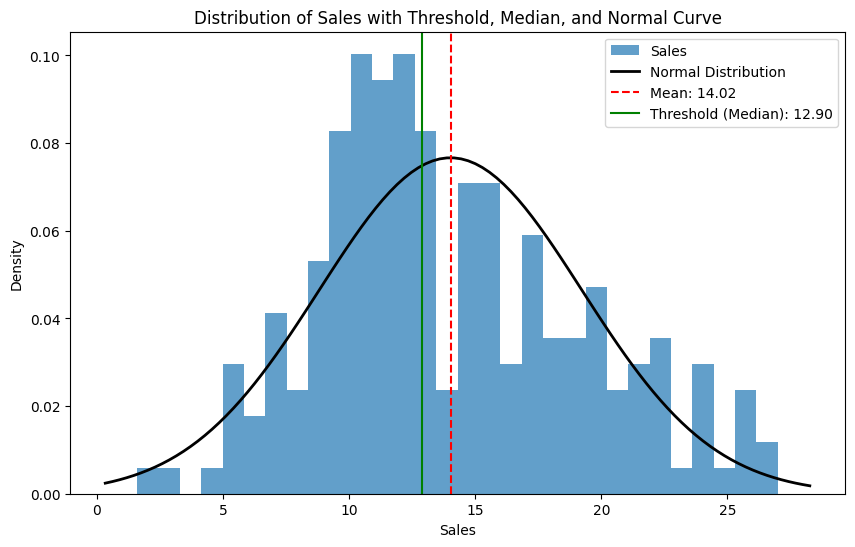

In [12]:
# Calculate the mean
mean = df['Sales'].mean()

# Calculate the median
median = df['Sales'].median()

# Use the median as the threshold
threshold = median

# Convert the target variable into binary classes
df['High_Sales'] = (df['Sales'] > threshold).astype(int)
print(df['High_Sales'].value_counts())
print("=====================================")
# Display relevant information
print(f"Mean (Average Sales): {mean:.2f}")
print(f"Median Sales: {median:.2f}")
print(df['High_Sales'].value_counts())

# Plot the distribution of sales, the threshold, and the median
plt.figure(figsize=(10, 6))
# Histogram
plt.hist(df['Sales'], bins=30, alpha=0.7, label='Sales', density=True)

# Add normal distribution curve
mu, std = norm.fit(df['Sales'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add threshold and median lines
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='-', label=f'Threshold (Median): {median:.2f}')

# Labels and title
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Sales with Threshold, Median, and Normal Curve')
plt.legend()
plt.show()

### Observations:
We have decided to use a threshold of the median of the target Sales. to be able to have the same number of samples in each class. <br>
In addition the median is a good threshold because it is not affected by the outliers. <br>

On this graph above, we have also shown the mean of the target Sales. to show that the median is a better threshold than the mean. <br>

#### **1.2: Exploratory data analysis (5 points)**

- Display, print or plot any relevant information.
- How is each feature doing on this new classification task?

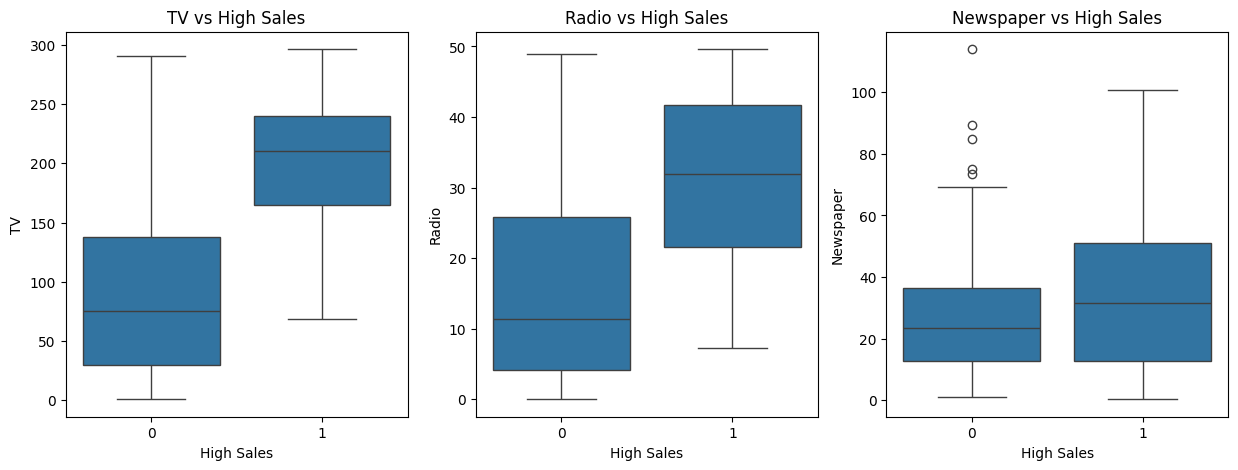

In [13]:
# TODO : do some visualization to show the relationship between the features and the high sales that is a binary variable
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(feature_names)):
    sns.boxplot(x='High_Sales', y=feature_names[i], data=df, ax=axs[i])
    axs[i].set_title(f'{feature_names[i]} vs High Sales')
    axs[i].set_xlabel('High Sales')
    axs[i].set_ylabel(feature_names[i])

### Observations:

We have diciided to plot the boxplot of the features for each class whith the new binary target Sales. <br>
This will help us to see the distribution of the data for each class. <br>

TODO Interpretation of the boxplot

Having ouliers in the data can affect the performances of the classification models. <br>

In [14]:
# create a variable to store the new taget variable
target_classified = df['High_Sales']

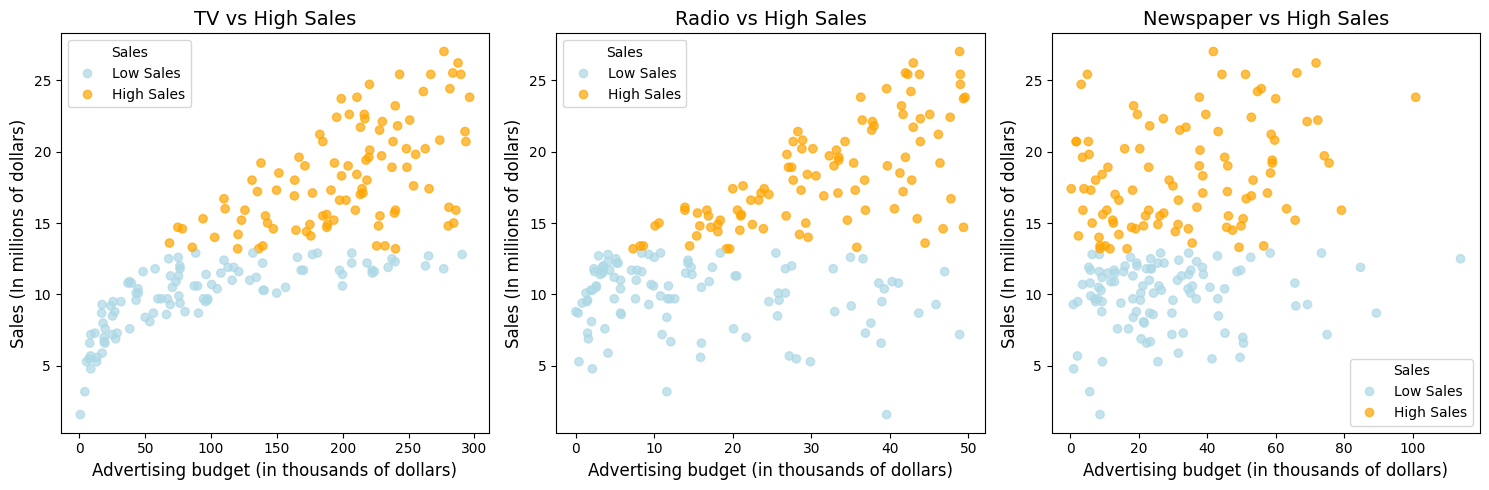

In [15]:
# Assuming feature_names, target_classified, and features are already defined
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# define colors for the scatter plot
cmap = mcolors.ListedColormap(['lightblue', 'orange'])

for i in range(len(feature_names)):
    # Scatter plot for the first row
    scatter = axs[i].scatter(features[:, i], target, c=target_classified, cmap=cmap, alpha=0.7)
    axs[i].set_ylabel("Sales (In millions of dollars)", fontsize=12)
    axs[i].set_xlabel("Advertising budget (in thousands of dollars)", fontsize=12)
    axs[i].set_title(f'{feature_names[i]} vs High Sales', fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    
    # Update legend to show "Low Sales" and "High Sales"
    legend_labels = {0: 'Low Sales', 1: 'High Sales'}
    handles, labels = scatter.legend_elements()
    labels = [legend_labels[int(label.strip('$\\mathdefault{}'))] for label in labels]
    axs[i].legend(handles, labels, title='Sales')

plt.tight_layout()
plt.show()

---

### **2. Classification (40 points)**

#### **2.1: Model Training and Evaluation (20 points)**

- Train several classification models and evaluate them.
- Display, print or plot any relevant information.
- Interpret the results.


In [26]:
# Create results DataFrame with model column
classification_results = pd.DataFrame(columns=['Feature', 'Model', 'Accuracy', 'Precision (sensitivity)', 'Recall (specificity)', 'F1', 'CV_Score'])

C:\Users\david\AppData\Local\Temp\ipykernel_13028\3795901597.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  classification_results = pd.concat([classification_results, pd.DataFrame([{


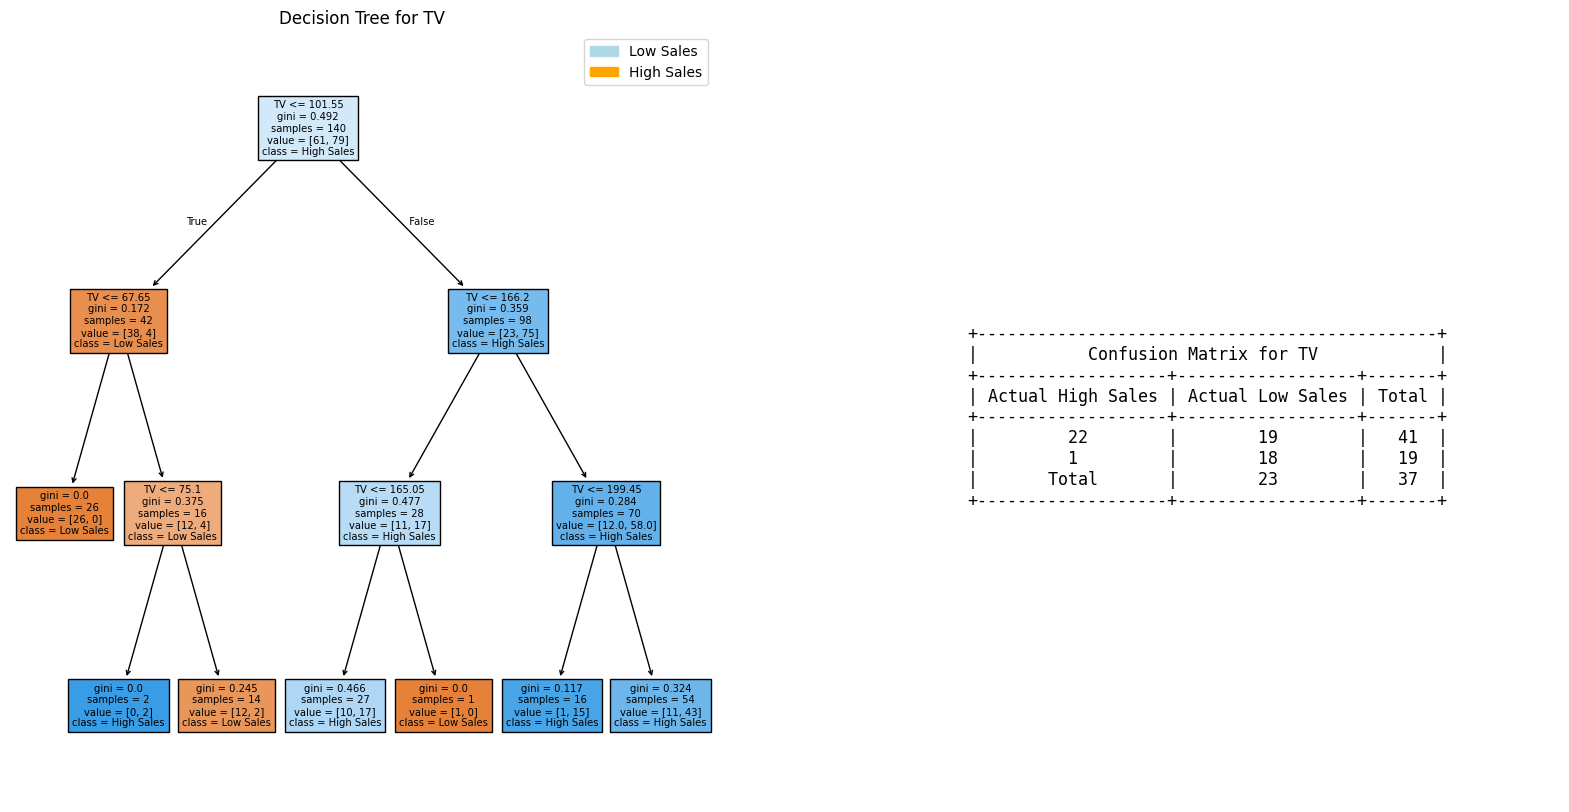

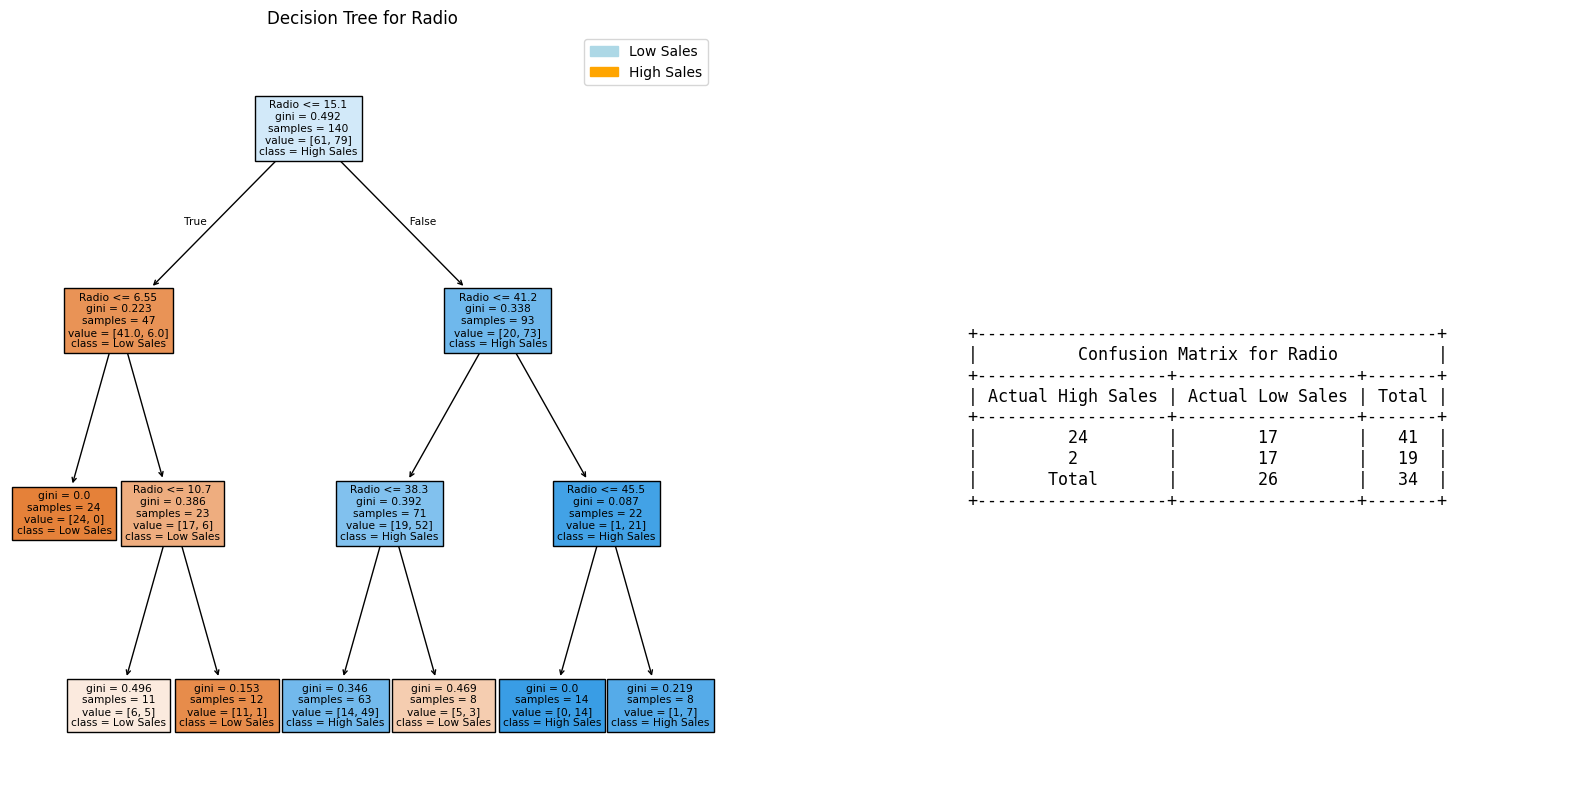

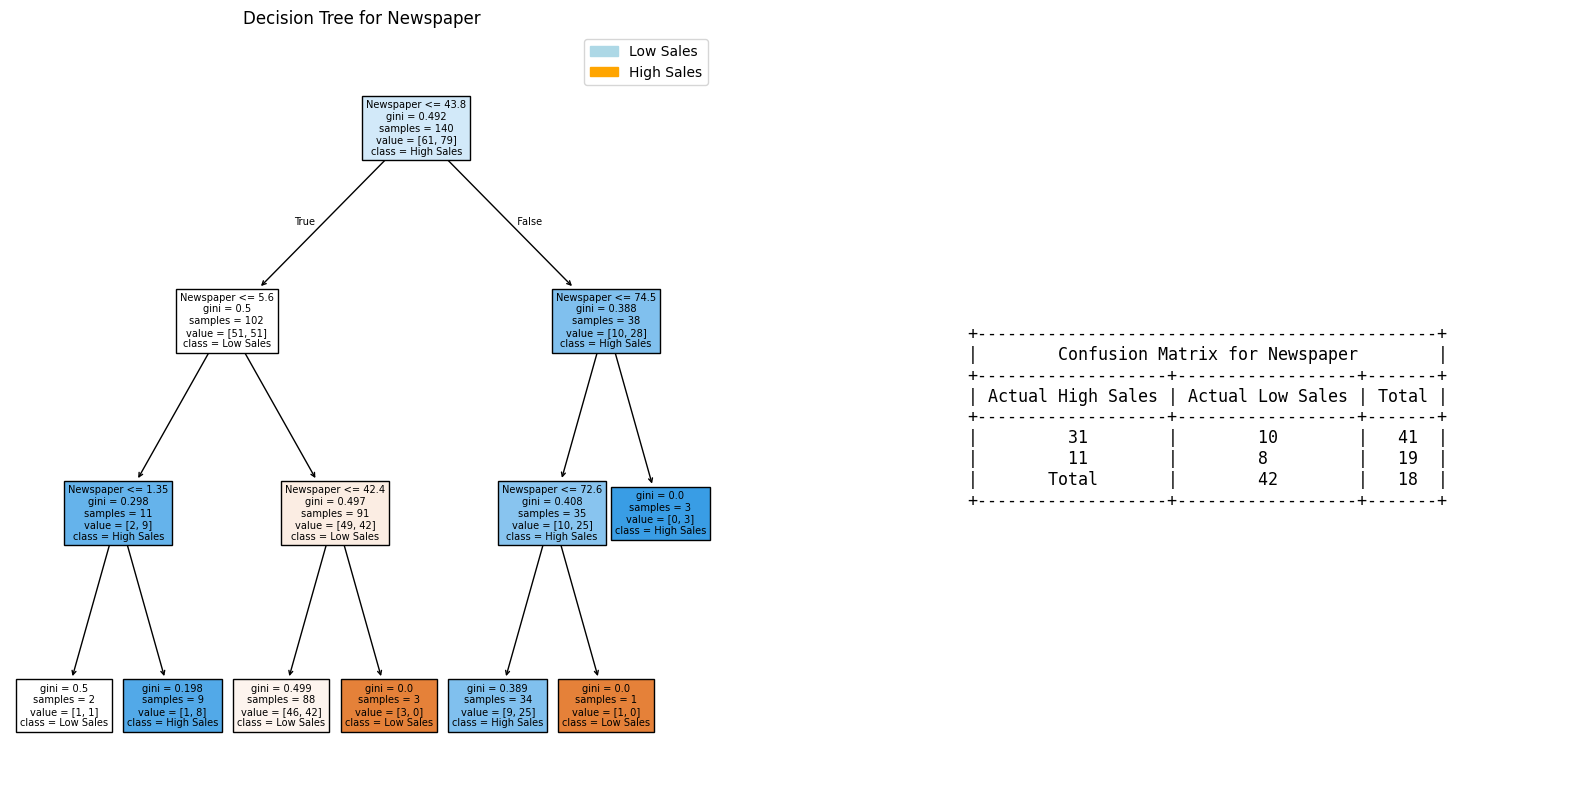

In [17]:
# Decision Tree Classifier
# Iterate over each feature and fit a Decision Tree Classifier
for i in range(len(feature_names)):
   # Split data
    X_train, X_test, y_train, y_test = train_test_split(features[:, i].reshape(-1, 1), target_classified, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    # Fit model
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=3)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = classification_report(y_test, y_pred, output_dict=True)['1'].values()
    cv_score = cross_val_score(model, features[:, i].reshape(-1, 1), target_classified, cv=5).mean()
    
    # Append to results DataFrame
    classification_results = pd.concat([classification_results, pd.DataFrame([{
        'Feature': feature_names[i],
        'Model': 'Decision Tree',
        'Accuracy': accuracy,
        'Precision (sensitivity)': precision,
        'Recall (specificity)': recall,
        'F1': f1,
        'CV_Score': cv_score
    }])], ignore_index=True)
    
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Plot the decision tree
    plot_tree(model, filled=True, feature_names=[feature_names[i]], class_names=['Low Sales', 'High Sales'], ax=ax[0])
    ax[0].set_title(f'Decision Tree for {feature_names[i]}')

    # Add legend to the colors
    low_sales_patch = mpatches.Patch(color='lightblue', label='Low Sales')
    high_sales_patch = mpatches.Patch(color='orange', label='High Sales')
    ax[0].legend(handles=[low_sales_patch, high_sales_patch])

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    table = PrettyTable()
    table.title = f'Confusion Matrix for {feature_names[i]}'
    table.field_names = ['Actual High Sales', 'Actual Low Sales', 'Total']
    table.add_row([cm[0, 0], cm[0, 1], cm[0, 0] + cm[0, 1]])
    table.add_row([cm[1, 0], cm[1, 1], cm[1, 0] + cm[1, 1]])
    table.add_row(['Total', cm[0, 0] + cm[1, 0], cm[0, 1] + cm[1, 1]])

    # Display the confusion matrix as text in the second subplot
    ax[1].axis('off')
    ax[1].text(0.5, 0.5, str(table), horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')

    plt.show()

### Interpretation of the results

In [97]:
from sklearn.metrics import auc, roc_curve, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_classifier(model, model_name, classification_results, show_normalized=False):
    num_features = len(feature_names)
    num_data_types = 2 if show_normalized else 1
    num_plots_per_feature = 3
    total_plots = num_features * num_data_types * num_plots_per_feature
    
    # Calculate the number of rows and columns for subplots
    num_rows = (total_plots + 2) // 3
    num_cols = 3
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, num_rows * 6))
    axes = axes.flatten()
    scaler = StandardScaler()
    
    plot_index = 0
    for i in range(num_features):
        # Get feature data
        X_feature = features[:, i].reshape(-1, 1)
        
        # Create data types
        data_types = [('Normalized', scaler.fit_transform(X_feature))]
        if show_normalized:
            data_types.append(('Non-normalized', X_feature))
        
        for data_type, X_data in data_types:
            # Split data 
            X_train, X_test, y_train, y_test = train_test_split(X_data, target_classified, test_size=TEST_SIZE, random_state=RANDOM_STATE)
            
            # Fit model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates for ROC curve
            
            # Calculate model performance
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            precision = report['1']['precision']
            recall = report['1']['recall']
            f1 = report['1']['f1-score']
            cv_score = cross_val_score(model, X_data, target_classified, cv=5).mean()
            
            # Append to results DataFrame
            classification_results = pd.concat([classification_results, pd.DataFrame([{
                'Feature': feature_names[i] + f' ({data_type})',
                'Model': model_name,
                'Accuracy': accuracy,
                'Precision (sensitivity)': precision,
                'Recall (specificity)': recall,
                'F1': f1,
                'CV_Score': cv_score
            }])], ignore_index=True)
            
            # Plot predicted values
            predictions = model.predict(X_data)
            ax = axes[plot_index]
            
            ax.scatter(X_data[predictions == 0], target[predictions == 0], c='orange', alpha=0.7, label='Predicted Low Sales')
            ax.scatter(X_data[predictions == 1], target[predictions == 1], c='lightblue', alpha=0.7, label='Predicted High Sales')
            
            # Highlight errors in different colors
            false_positives = (predictions == 1) & (target_classified == 0)
            false_negatives = (predictions == 0) & (target_classified == 1)
            
            ax.scatter(X_data[false_positives], target[false_positives], c='blue', label='False Positives')
            ax.scatter(X_data[false_negatives], target[false_negatives], c='red', label='False Negatives')
            
            ax.set_xlabel(f"{feature_names[i]} ({data_type})")
            ax.set_ylabel('Sales')
            ax.set_title(f'Predicted Values and Errors for {feature_names[i]} ({data_type})')
            ax.legend()
            
            # Build confusion matrix table
            cm = confusion_matrix(y_test, y_pred)
            table = PrettyTable()
            table.title = f'Confusion Matrix for {feature_names[i]} ({data_type})'
            table.field_names = ['Actual \\ Predicted', 'Low Sales', 'High Sales', 'Total']
            table.add_row(['Low Sales', cm[0,0], cm[0,1], cm[0,0] + cm[0,1]])
            table.add_row(['High Sales', cm[1,0], cm[1,1], cm[1,0] + cm[1,1]])
            table.add_row(['Total', cm[0,0] + cm[1,0], cm[0,1] + cm[1,1], cm.sum()])
            
            # Display the confusion matrix as text
            ax = axes[plot_index + 1]
            ax.axis('off')
            ax.text(0.5, 0.5, str(table), horizontalalignment='center', verticalalignment='center', fontsize=12, family='monospace')
            ax.set_title(f'Confusion Matrix for {feature_names[i]} ({data_type})')
            
            # Plot ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            ax = axes[plot_index + 2]
            ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
            ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(f'ROC Curve for {feature_names[i]} ({data_type})')
            ax.legend(loc="lower right")
            
            plot_index += 3
            
    # Add a main title to the plot
    plt.suptitle(model_name + " Relationship between advertising budget and sales", fontsize=20, y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
    
    return classification_results

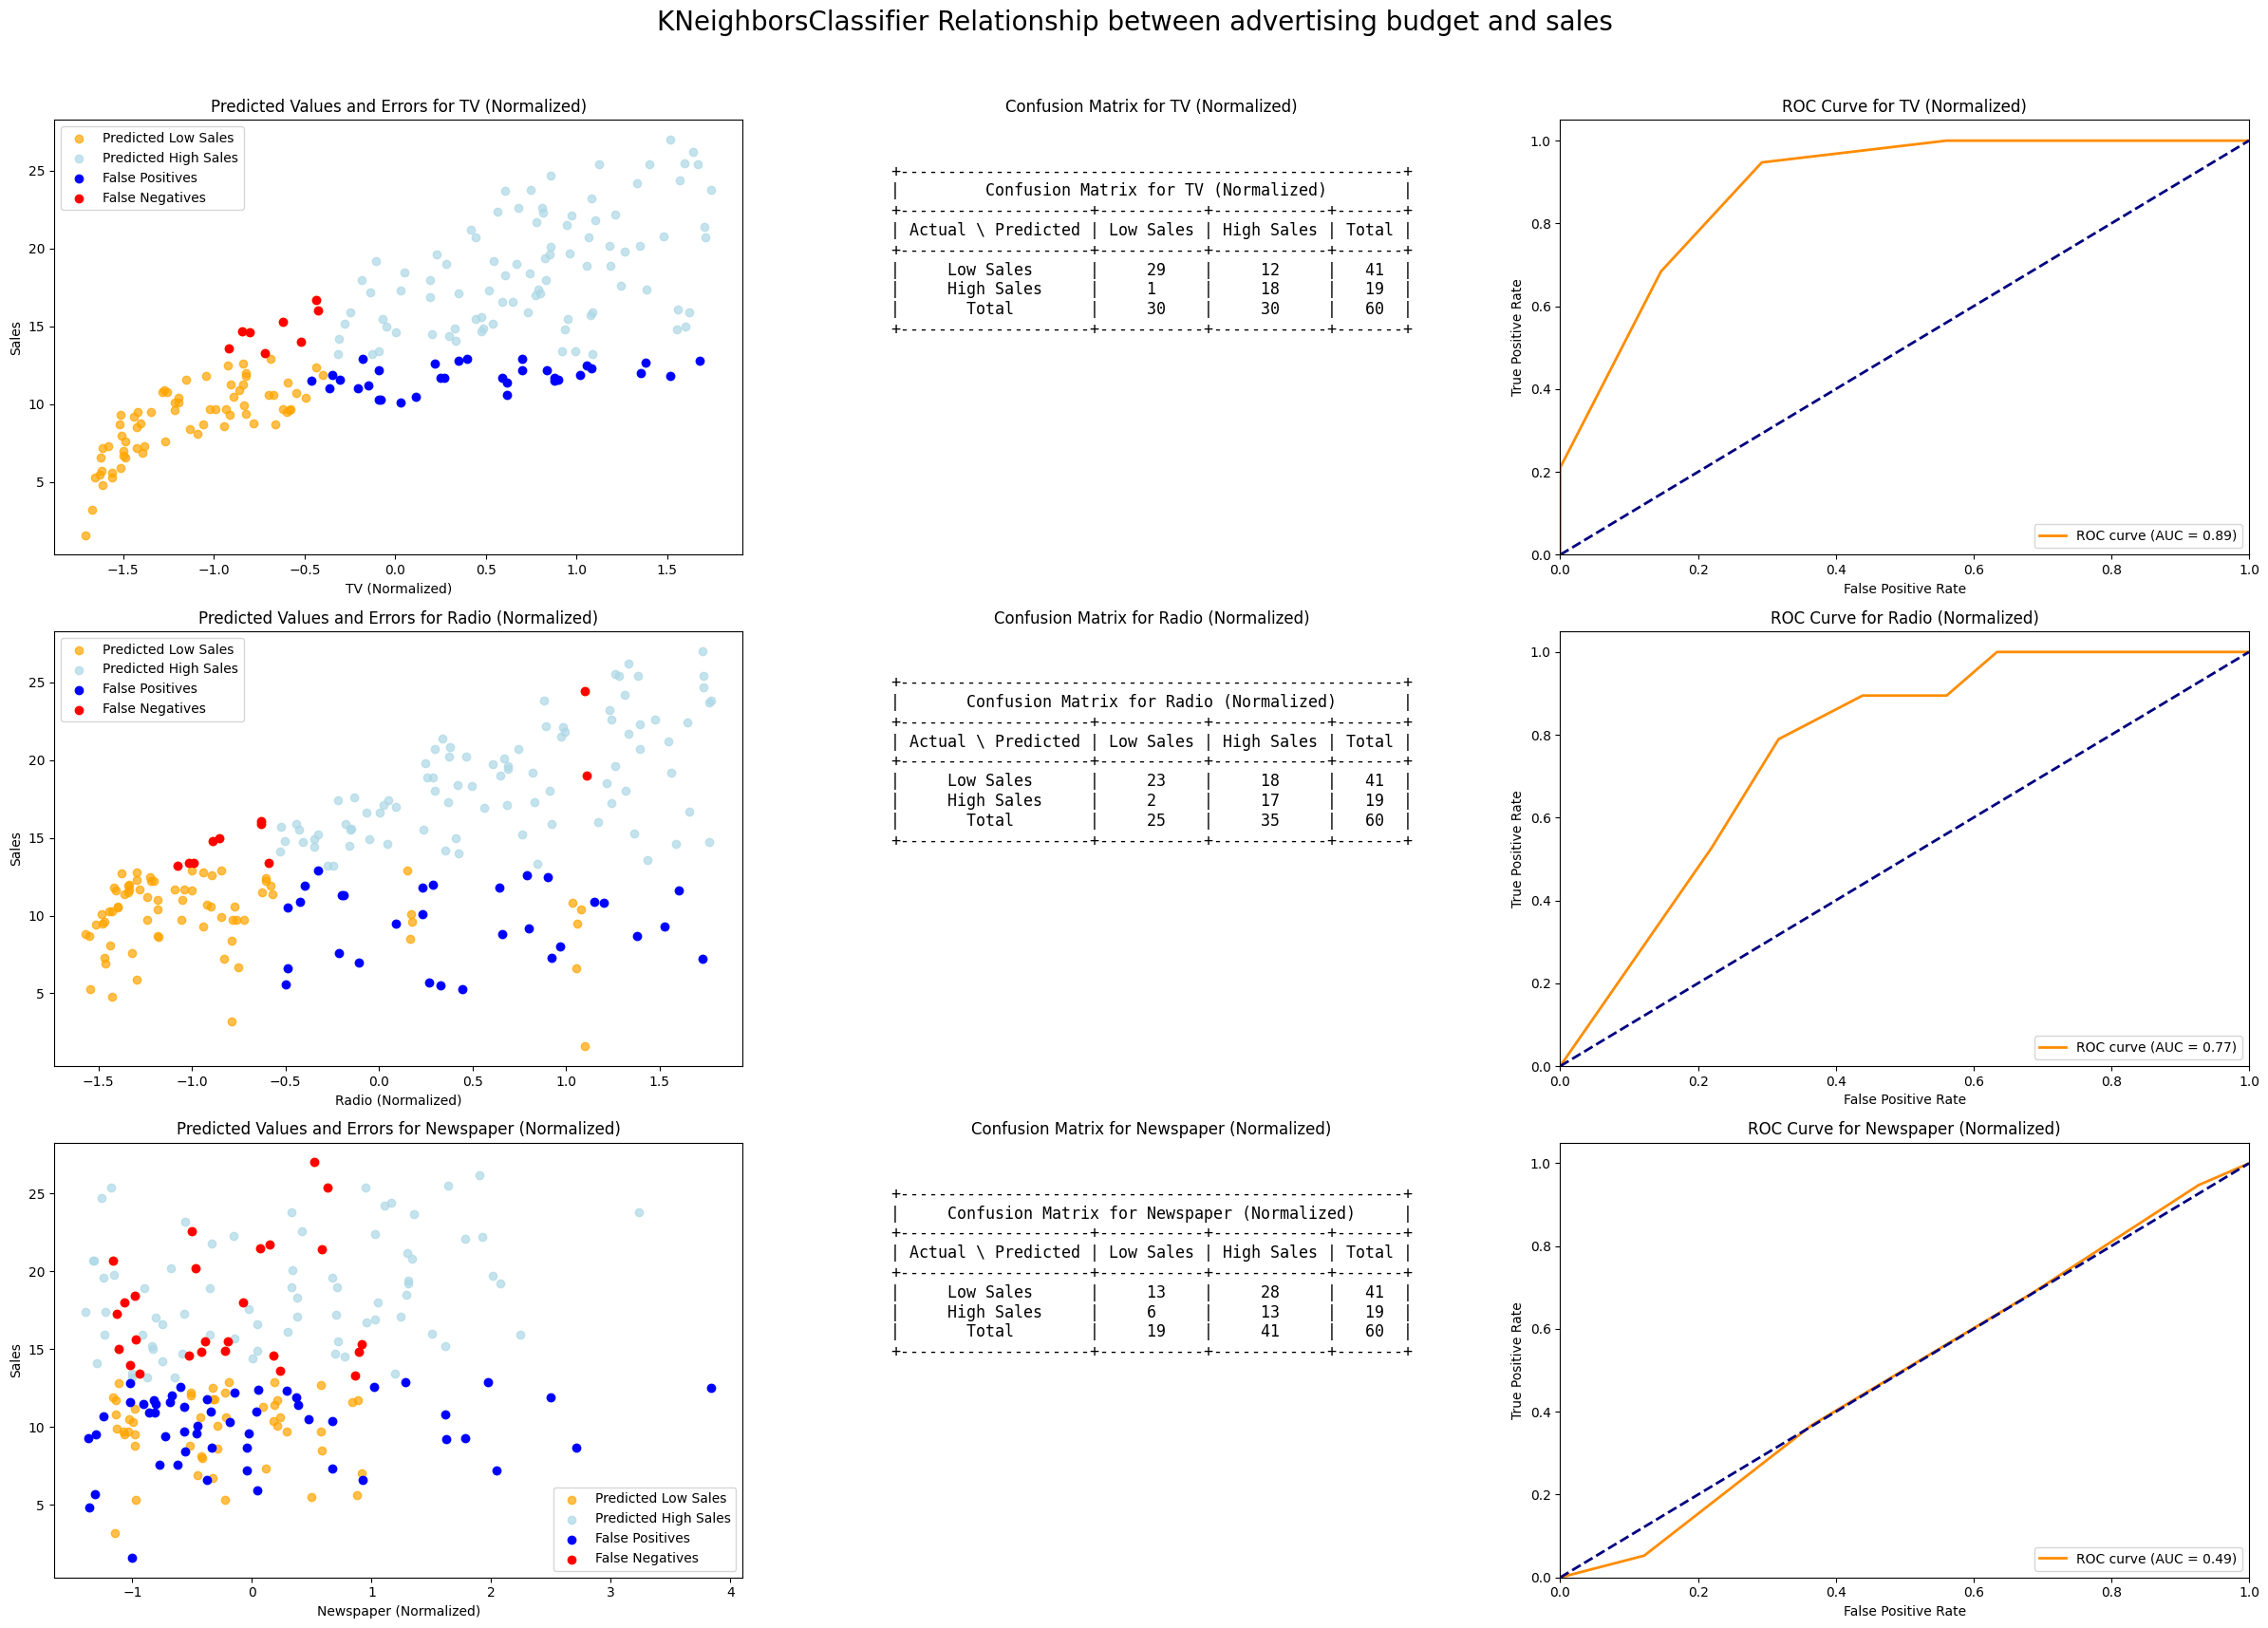

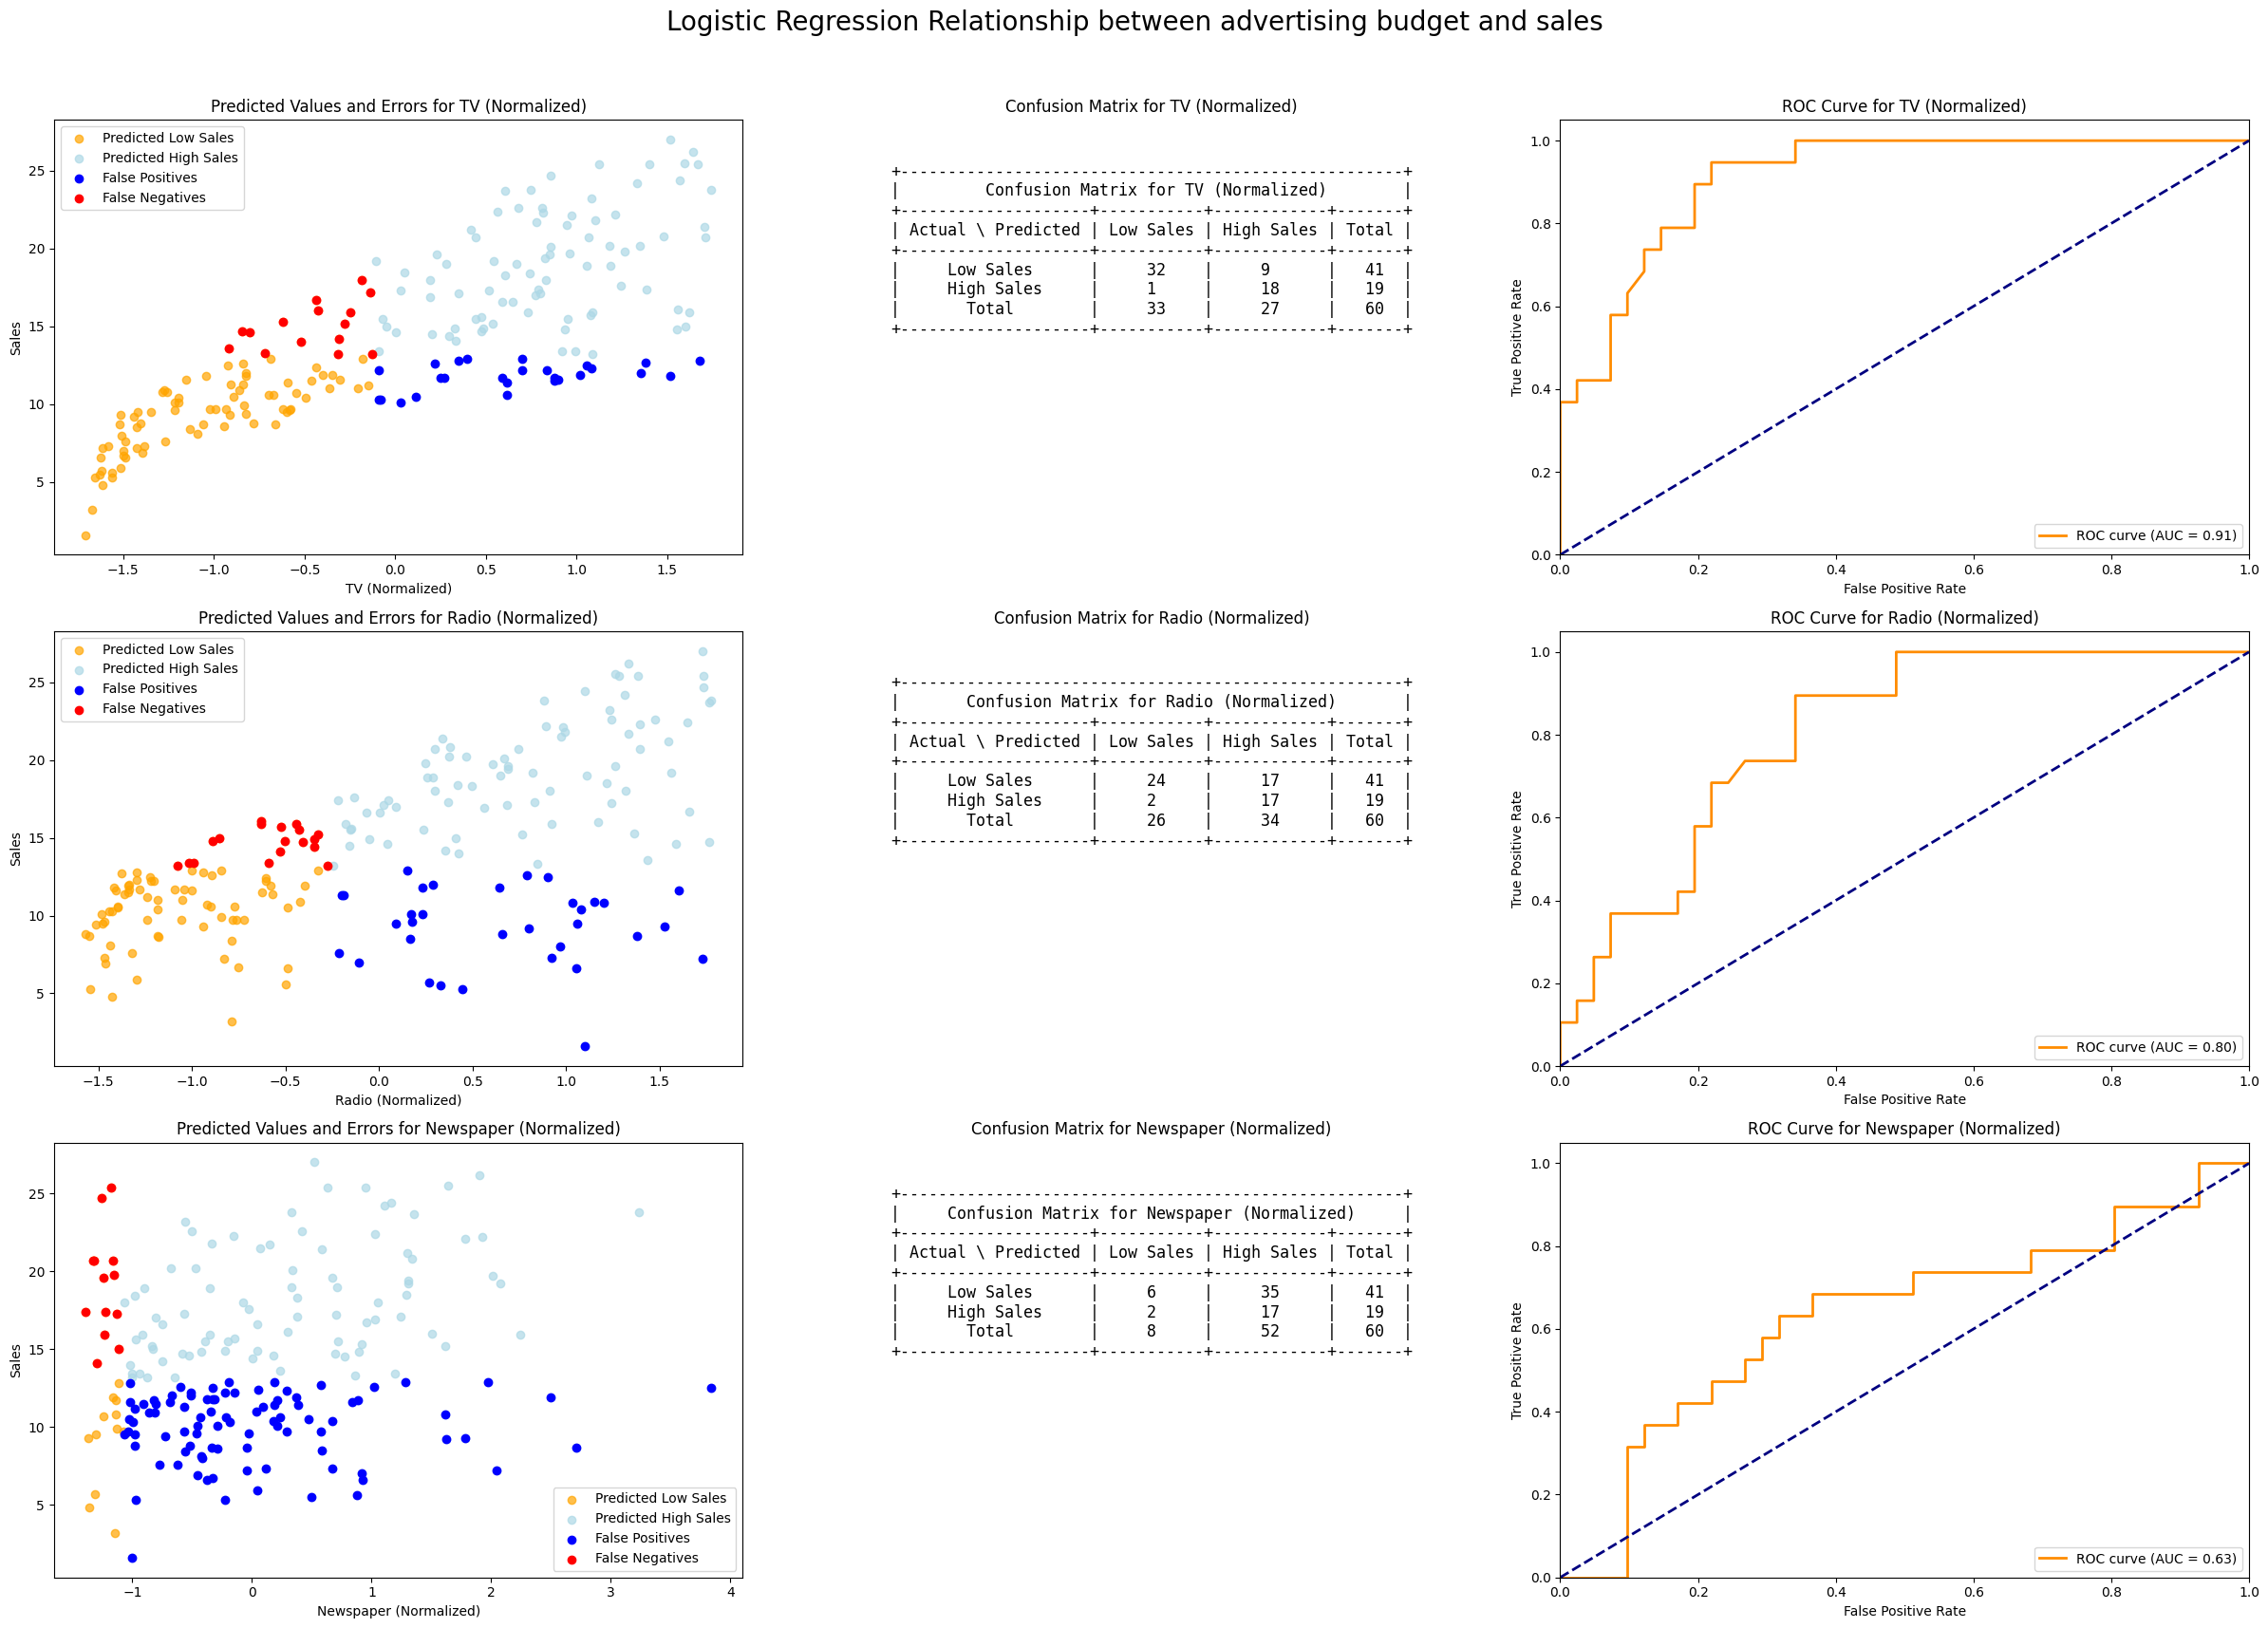

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


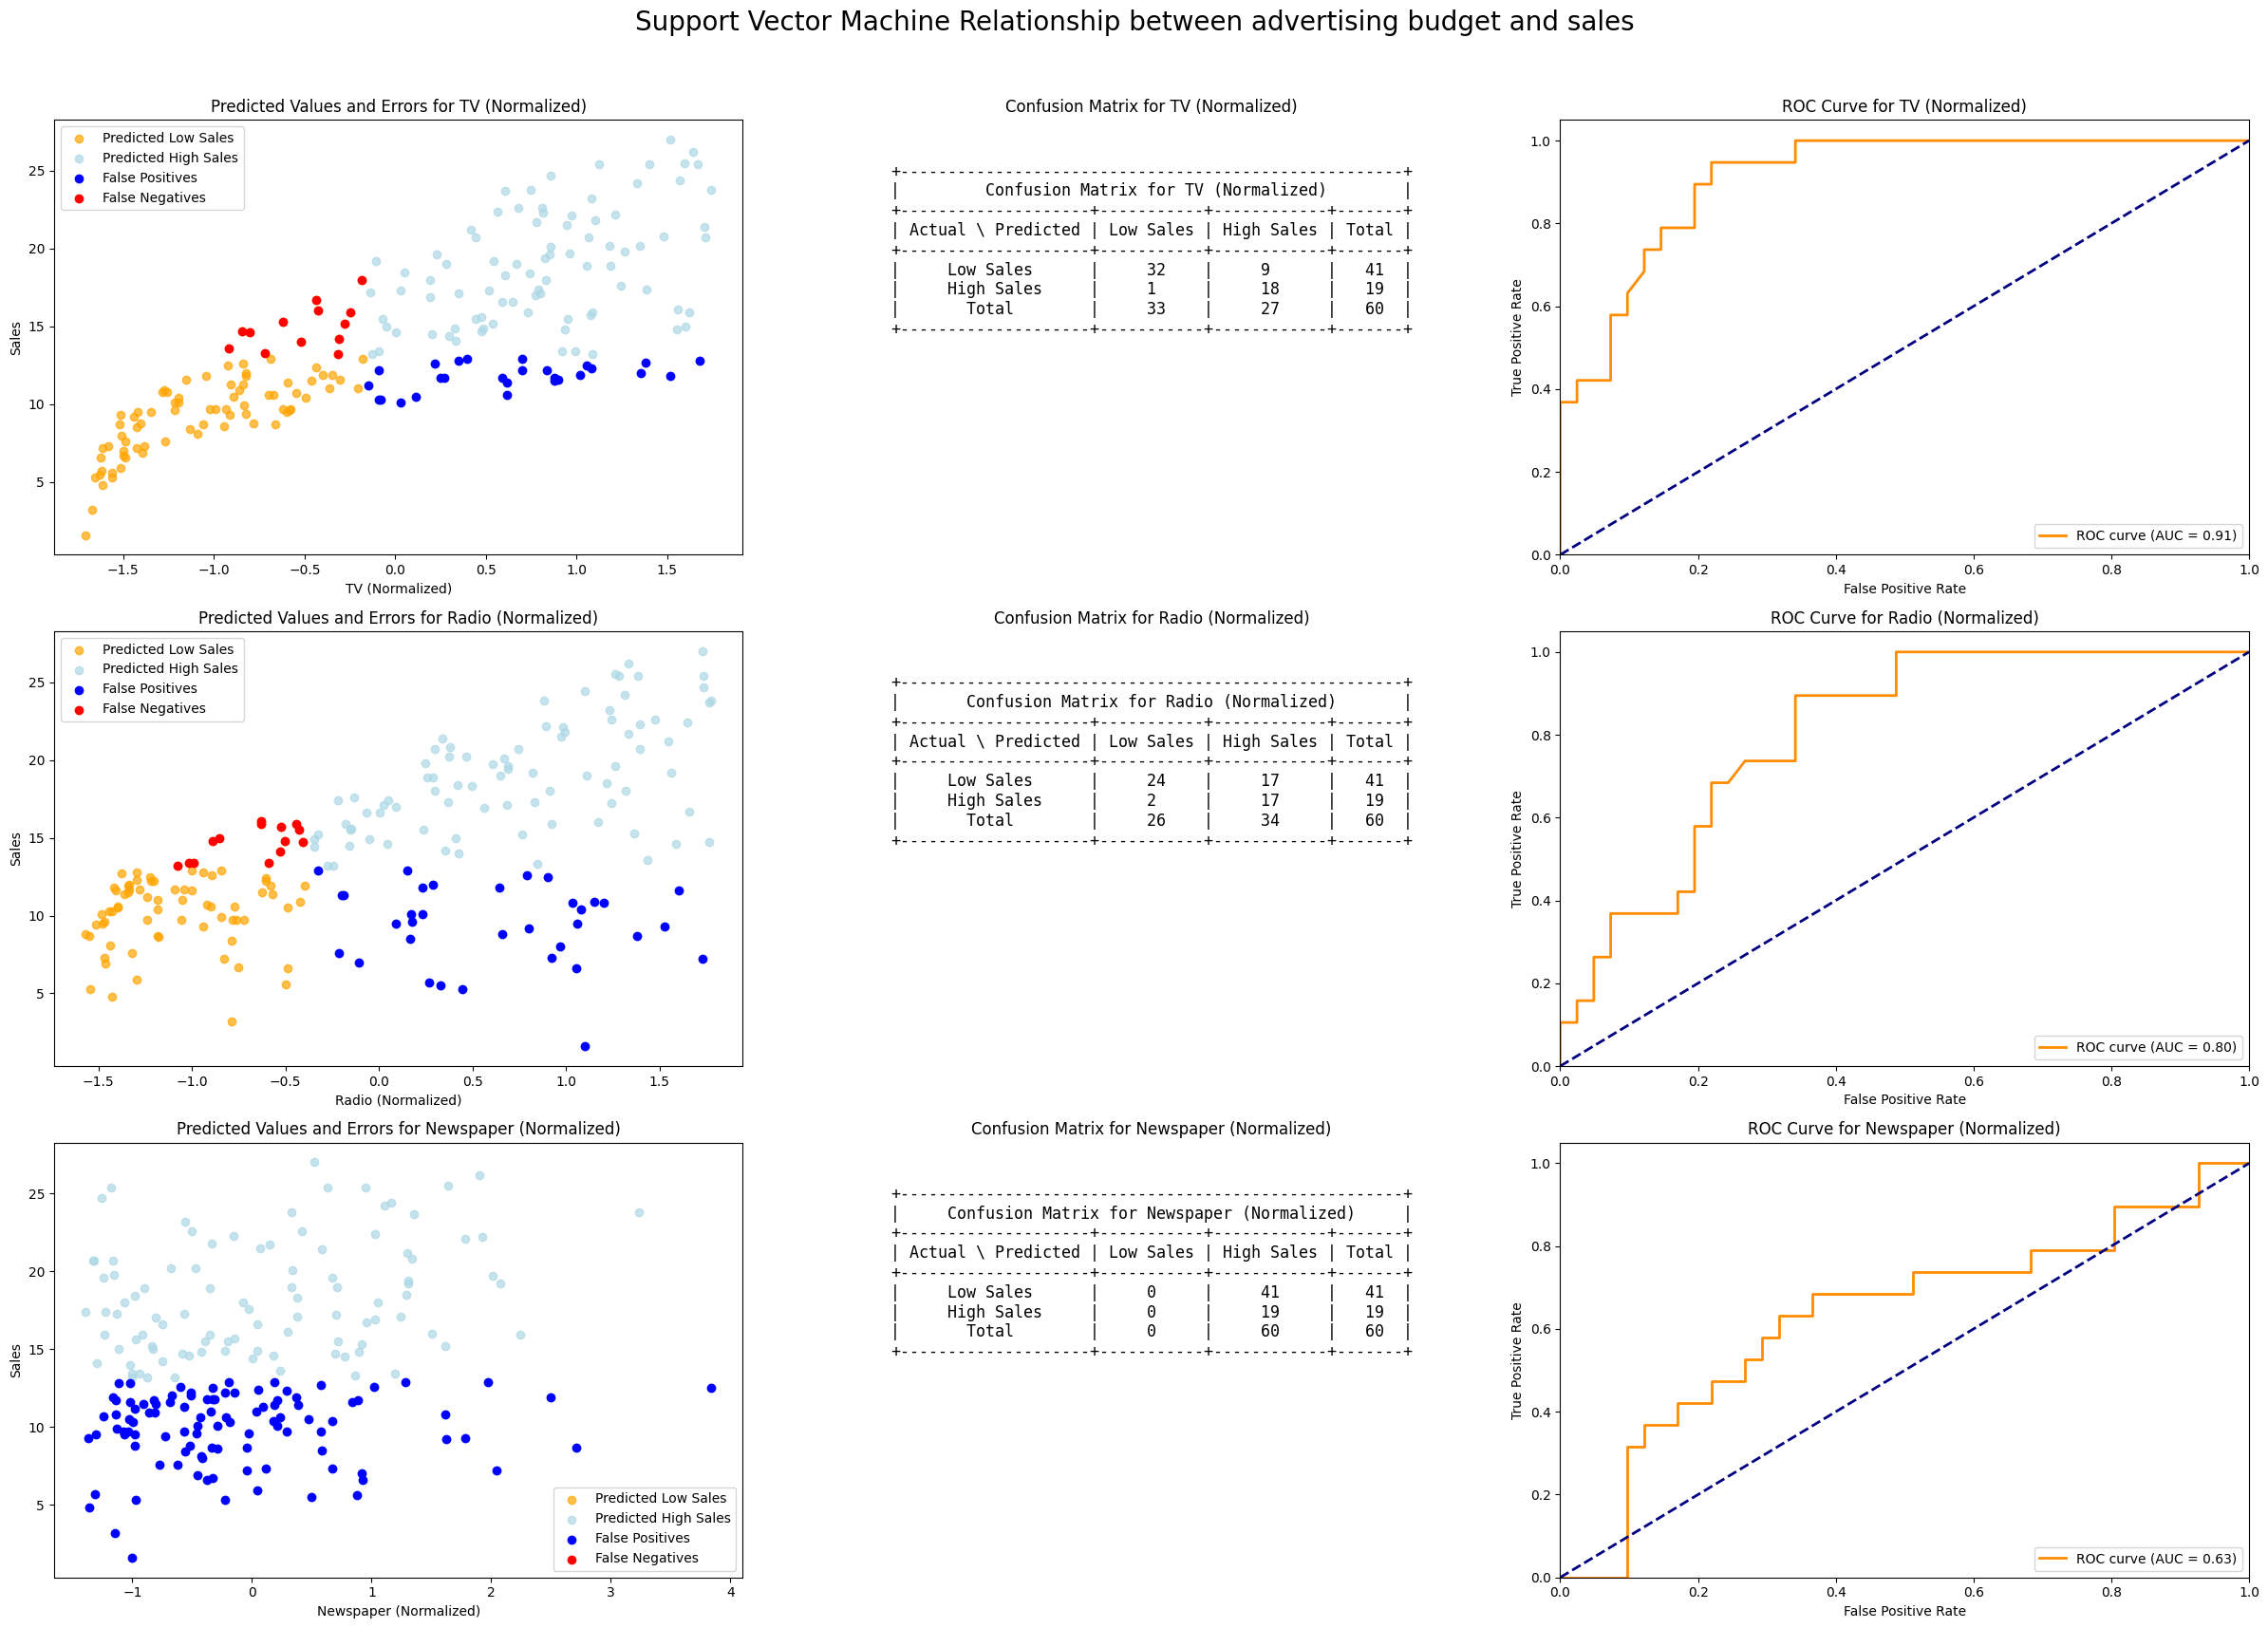

In [96]:
# KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
classification_results = evaluate_classifier(model, "KNeighborsClassifier", classification_results)

# Logistic Regression
model = LogisticRegression()
classification_results = evaluate_classifier(model, "Logistic Regression", classification_results)

# Support Vector Machine
model = SVC(kernel='linear', probability=True)
classification_results = evaluate_classifier(model, "Support Vector Machine", classification_results)

 ### Interpretation of the results 
 

In [35]:
# Display results table with rounded values
print("\nClassification Results (sorted by F1 score):")
results_sorted = classification_results.sort_values(['Feature', 'F1'], ascending=[False, True])

# Round numeric columns to 3 decimal places
numeric_columns = results_sorted.select_dtypes(include=['float64']).columns
results_sorted[numeric_columns] = results_sorted[numeric_columns].round(3)

# Create and format table
table = PrettyTable()
table.field_names = results_sorted.columns
for row in results_sorted.itertuples(index=False):
    table.add_row(row)

print(table)
print("\nNote: Accuracy, Precision, Recall, and F1 scores range from 0 to 1, with higher values indicating better performance.")


Classification Results (sorted by F1 score):
+-----------+------------------------+----------+-------------------------+----------------------+-------+----------+
|  Feature  |         Model          | Accuracy | Precision (sensitivity) | Recall (specificity) |   F1  | CV_Score |
+-----------+------------------------+----------+-------------------------+----------------------+-------+----------+
|     TV    |  KNeighborsClassifier  |  0.783   |           0.6           |        0.947         | 0.735 |  0.755   |
|     TV    |  Logistic Regression   |  0.833   |          0.667          |        0.947         | 0.783 |  0.785   |
|     TV    | Support Vector Machine |  0.833   |          0.667          |        0.947         | 0.783 |  0.785   |
|   Radio   |  KNeighborsClassifier  |  0.667   |          0.486          |        0.895         |  0.63 |  0.725   |
|   Radio   |  Logistic Regression   |  0.683   |           0.5           |        0.895         | 0.642 |  0.715   |
|   Radio 

In [ ]:
# Create comparative visualizations
plt.figure(figsize=(15, 6))
sns.barplot(data=classification_results, x='Feature', y='F1', hue='Model')
plt.title('Model Performance Comparison (F1 Score)')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### observations:

#### **2.2: PCA (20 points)**

- Apply PCA and train the classification model of your choice.
- Display, print or plot any relevant information.
- Discuss how PCA affects model performance and interpret the results.

In [ ]:
# TODO

# observations:

---

## **Task 3 (Bonus): Unsupervised Learning**

In this task, you will use unsupervised learning techniques to explore and segment the data based on advertising budgets.

### **1. Clustering (10 points)**

#### **1.1: K-Means (10 points)**

- Apply K-Means clustering to segment the data. Feel free to use any feature or combinaison.
- Display, print or plot any relevant information.
- Discuss the characteristics of each cluster.

In [ ]:
number_of_clusters = np.arange(2, 60)

# Create a table to store the clustering results
clustering_results = pd.DataFrame(columns=['Feature', 'Number of Clusters', 'Silhouette Score'])

# Iterate over features and models
for i in range(len(feature_names)):
    X_train, X_test, y_train, y_test = train_test_split(features[:, i].reshape(-1, 1), target, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    # for each number of clusters
    for n_clusters in number_of_clusters:
        # Create KMeans model
        kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
        y_pred = kmeans.fit_predict(X_train)
        
        # Calculate silhouette score
        silhouette = round(silhouette_score(X_train, y_pred), 3)
        
        # Add results
        new_row = {
            'Feature': feature_names[i],
            'Number of Clusters': n_clusters,
            'Silhouette Score': silhouette
        }
        
        clustering_results = pd.concat([clustering_results, pd.DataFrame([new_row])], ignore_index=True)

# Plot the silhouette score evolution for each feature
plt.figure(figsize=(15, 6))
sns.lineplot(data=clustering_results, x='Number of Clusters', y='Silhouette Score', hue='Feature', marker='o')
plt.title('Silhouette Score Evolution for Different Features')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Find the best number of clusters for each feature
best_clusters = clustering_results.loc[clustering_results.groupby('Feature')['Silhouette Score'].idxmax()]

# Visualize the clusters for the best number of clusters for each feature horizontally
num_features = len(feature_names)
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))

for i, ax in enumerate(axes):
    feature = feature_names[i]
    best_n_clusters = best_clusters[best_clusters['Feature'] == feature]['Number of Clusters'].values[0]
    best_silhouette = best_clusters[best_clusters['Feature'] == feature]['Silhouette Score'].values[0]
    
    # Create KMeans model with the best number of clusters
    kmeans = KMeans(n_clusters=best_n_clusters, random_state=RANDOM_STATE)
    y_pred = kmeans.fit_predict(features[:, i].reshape(-1, 1))
    
    # Plot the clusters
    ax.scatter(features[:, i], target, c=y_pred, cmap='viridis')
    for center in kmeans.cluster_centers_:
        ax.scatter(center, target[np.argmin(np.abs(features[:, i] - center))], c='red', marker='x')
    ax.set_title(f'{feature} with {best_n_clusters} Clusters\nSilhouette Score: {best_silhouette}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

# Display results table
table = PrettyTable()
table.field_names = clustering_results.columns
for row in clustering_results.itertuples(index=False):
    table.add_row(row)
print(table)
print("\nNote: Higher silhouette score indicates better clustering")


### Observations: TODO

We have observed that the k-means algorithm has acheive to create quite good clusters.
For exmaple for the TV feature, the algorithm has best performed with 2 clusters, and the clusters are well separated. (pratically separated the bugdet of advertising in two groups)

For the other features, the algorithm has also performed well, but for the Newspaper feature, the clusters are not as well separated as the other features. This is because the Newspaper feature does not have a relationship with the target Sales. <br>

In [ ]:
# TODO try kmeans clustering with all features
# Create a table to store the clustering results
clustering_results = pd.DataFrame(columns=['Number of Clusters', 'Silhouette Score'])

# for each number of clusters
for n_clusters in number_of_clusters:
    # Create KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
    y_pred = kmeans.fit_predict(features)
    
    # Calculate silhouette score
    silhouette = round(silhouette_score(features, y_pred), 3)
    
    # Add results
    new_row = {
        'Number of Clusters': n_clusters,
        'Silhouette Score': silhouette
    }
    
    clustering_results = pd.concat([clustering_results, pd.DataFrame([new_row])], ignore_index=True)
    
# Plot the silhouette score evolution for all features
plt.figure(figsize=(15, 6))
sns.lineplot(data=clustering_results, x='Number of Clusters', y='Silhouette Score', marker='o')
plt.title('Silhouette Score Evolution for All Features')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()



### more observations:  TODO